Notebook is based on the following video:
[Andrej Karapathy Lecture Video on RNN](https://www.youtube.com/watch?v=yCC09vCHzF8)

[Gist Link](https://gist.github.com/karpathy/d4dee566867f8291f086)

In [1]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
!ls

--2020-04-26 12:53:01--  https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   1.06M  --.-KB/s    in 0.007s  

2020-04-26 12:53:01 (153 MB/s) - ‘shakespeare.txt’ saved [1115394/1115394]

sample_data  shakespeare.txt


In [0]:
import numpy as np

In [3]:
data = open('shakespeare.txt', 'r').read().lower()
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print("Length of data - {}\n Number of chars - {}".format(
    data_size,
    vocab_size
))
char2idx = {ch:i for i,ch in enumerate(chars)}
idx2char = {i:ch for i,ch in enumerate(chars)}

Length of data - 1115394
 Number of chars - 39


In [4]:
print(data[:50])

first citizen:
before we proceed any further, hear


In [5]:
seq_length = 12
sequences = []
for i in range(0,data_size - seq_length + 1, seq_length):
  seq = data[i:i+seq_length]
  sequences.append(seq)
print(sequences[:5])

['first citize', 'n:\nbefore we', ' proceed any', ' further, he', 'ar me speak.']


In [6]:
print("Total Sequences: ",len(sequences))

Total Sequences:  92949


In [7]:
enc_lines = []
for line in sequences:
  enc_line = [char2idx[ch] for ch in line]
  enc_lines.append(enc_line)
print("Encoded Lines:", enc_lines[:5])

Encoded Lines: [[34, 0, 20, 14, 9, 32, 11, 0, 9, 0, 31, 1], [16, 10, 17, 6, 1, 34, 23, 20, 1, 32, 3, 1], [32, 5, 20, 23, 11, 1, 1, 21, 32, 29, 16, 36], [32, 34, 22, 20, 9, 28, 1, 20, 33, 32, 28, 1], [29, 20, 32, 7, 1, 32, 14, 5, 1, 29, 35, 12]]


In [8]:
from numpy import array
import keras
from pickle import dump

Using TensorFlow backend.


In [16]:
enc_lines_np = np.array(enc_lines)
X,Y = enc_lines_np[:,:-1], enc_lines_np[:,-1]

print(X[0], Y[0])

[34  0 20 14  9 32 11  0  9  0 31] 1


In [0]:
from keras.utils import to_categorical

In [17]:
# convert to one-hot encoded format
seqs = []
for i in range((X.shape[0])):
  line = X[i]
  one_hot = [to_categorical(x, num_classes=vocab_size) for x in line]
  seqs.append(one_hot)

X = np.array(seqs)
print(X.shape)

(92949, 11, 39)


In [18]:
Y = to_categorical(Y, num_classes = vocab_size )
print(Y.shape)

(92949, 39)


In [19]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    75, input_shape = (X.shape[1], X.shape[2])
))
model.add(keras.layers.Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                34500     
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2964      
Total params: 37,464
Trainable params: 37,464
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X,Y, epochs = 100, verbose = 2) 

Epoch 1/100
 - 25s - loss: 1.1705 - accuracy: 0.6334
Epoch 2/100
 - 25s - loss: 1.1684 - accuracy: 0.6332
Epoch 3/100
 - 26s - loss: 1.1686 - accuracy: 0.6342
Epoch 4/100
 - 26s - loss: 1.1666 - accuracy: 0.6346
Epoch 5/100
 - 25s - loss: 1.1653 - accuracy: 0.6347
Epoch 6/100
 - 26s - loss: 1.1644 - accuracy: 0.6346
Epoch 7/100
 - 27s - loss: 1.1626 - accuracy: 0.6350
Epoch 8/100
 - 25s - loss: 1.1608 - accuracy: 0.6365
Epoch 9/100
 - 25s - loss: 1.1610 - accuracy: 0.6357
Epoch 10/100
 - 25s - loss: 1.1582 - accuracy: 0.6369
Epoch 11/100
 - 26s - loss: 1.1573 - accuracy: 0.6373
Epoch 12/100
 - 26s - loss: 1.1578 - accuracy: 0.6360
Epoch 13/100
 - 25s - loss: 1.1549 - accuracy: 0.6390
Epoch 14/100
 - 25s - loss: 1.1550 - accuracy: 0.6374
Epoch 15/100
 - 26s - loss: 1.1533 - accuracy: 0.6381
Epoch 16/100
 - 25s - loss: 1.1526 - accuracy: 0.6387
Epoch 17/100
 - 25s - loss: 1.1517 - accuracy: 0.6379
Epoch 18/100
 - 25s - loss: 1.1514 - accuracy: 0.6385
Epoch 19/100
 - 27s - loss: 1.1489 - 

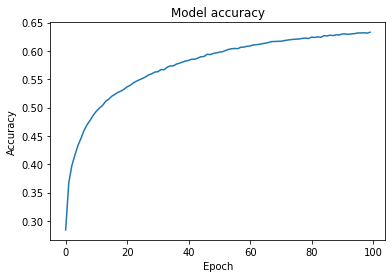

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [0]:
  model.save('model.h5')
  dump(char2idx, open('mapping.pkl','wb'))

In [0]:
import keras
# Generate characters

def generate_seq(model, mapping,n_chars, seq_length = 12, seed_text='the'):
  in_text = seed_text
  # generate fixed number of chars
  for _ in range(n_chars):
    # encode chars as int
    encoded = [mapping[ch] for ch in in_text]
    encoded = keras.preprocessing.sequence.pad_sequences(
        [encoded], maxlen=seq_length, truncating='pre'
    )
    # one-hot
    encoded = np.array([to_categorical(x, num_classes=len(mapping)) for x in encoded])
    # preedict char
    y = model.predict_classes(encoded, verbose=0)
    out_char = ''
    for char, index in mapping.items():
      if index == y:
        out_char = char
        break
    in_text += out_char
  return in_text

In [43]:
print(generate_seq(model, char2idx, 70, 11, 'from faiest' ))
print(generate_seq(model, char2idx, 70, 11, 'making a famine'))
print(generate_seq(model, char2idx, 70, 11, 'hello worl'))

from faiesters he should i says, the wid the trump: you have not but there shall 
making a famines.

autolli:
nleit redame
for have not knee here?

for helvold you are
hello worle hand shopl has mother.

king richard iii:
then mend them. there east
